# 1. Introduction

Airbnb is an online marketplace that connects people who are looking for a place to stay with individuals who have a spare room or property to rent out. Founded in 2008, Airbnb has become a popular platform for travelers to find unique and affordable accommodations all around the world. Hosts can list their properties on the website and set their own prices and availability, while guests can search for listings based on their preferences and book directly with the host. Airbnb offers a range of different types of accommodations, from private rooms in a shared apartment to entire houses and apartments. The platform also provides a review system, allowing guests to leave feedback on their stay and helping hosts build a positive reputation.





# 2. Librairies and Data extraction

In [122]:
# data analysis
import pandas as pd
import numpy as np

# data visualization
!pip3 install seaborn
import seaborn as sns
import matplotlib.pyplot  as plt
!pip3 install missingno
import missingno as msno

from scipy.stats import norm
from scipy import stats
!pip3 install sklearn

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [123]:
#from google.colab import drive
#drive.mount('/content/drive')


In [124]:
#path = '/content/drive/MyDrive/T2-DSBA/Ensemble/airbnb/AB_NYC_2019.csv'

In [125]:
df = pd.read_csv('AB_NYC_2019.csv')


Let us examine the dataset

In [126]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Our goal is to predict our target variable - price based on the other features

In [127]:
#Size of dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [128]:
# Descriptive statistics of our variables

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [129]:
# Variable types
    
df.dtypes.value_counts()

int64      7
object     6
float64    3
dtype: int64

In [130]:
df.columns 

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# 3. Data Cleaning

### 3.a) Dealing with missing values 

In [131]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<Axes: >

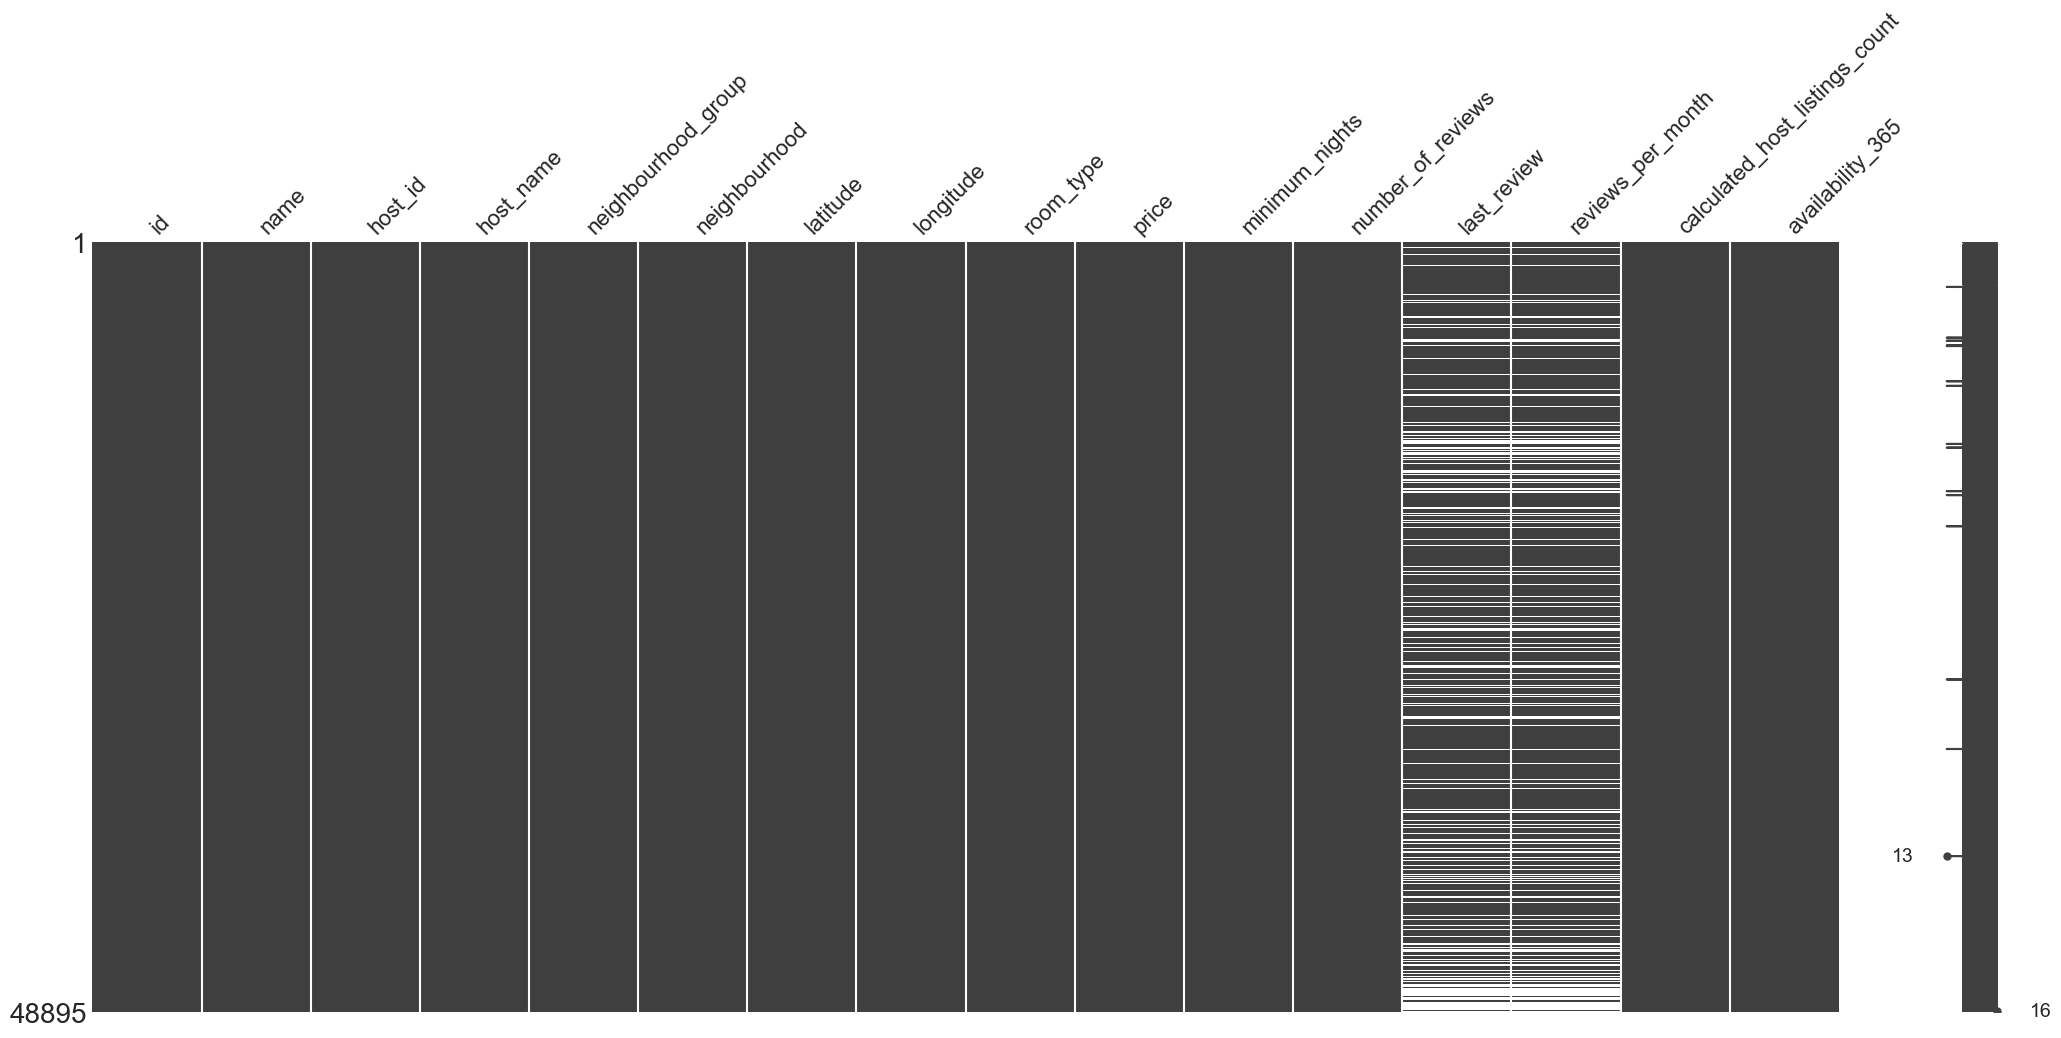

In [132]:
#Visualization for missing values
msno.matrix(df)

The feature "reviews_per_month" contains some incomplete data which will be substituted with the mean.

In [133]:
mean = df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(mean, inplace=True)
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

For our analysis, we won't need the following features : host_name and id. Therefore, we drop it from out dataframe

In [134]:
df = df.drop(columns=['host_name','id'])
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1.373221,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


### 3.b) Data Transformation 

/var/folders/7_/m8tf5s7d4bz_k2fcgvs7r_wr0000gn/T/ipykernel_79418/2682963974.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], fit=norm)


Text(0.5, 1.0, 'Price Distribution Plot')

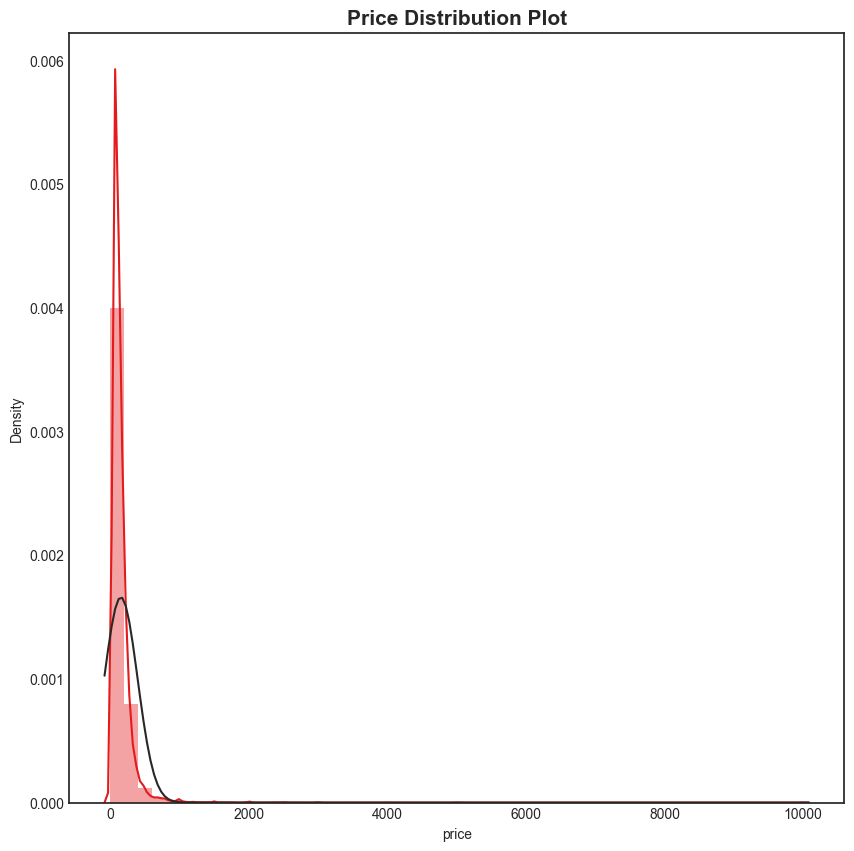

In [135]:
plt.figure(figsize=(10,10))
sns.distplot(df['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

The distribution graph depicted above indicates that the price feature follows a right-skewed distribution with a positive skewness. To mitigate this skewness and improve the interpretability and statistical analysis of the data, a log transformation will be applied to the feature. However, as division by zero is a potential issue, a log+1 transformation would be more suitable in this case.





In [136]:
df['price_log'] = np.log(df.price+1)

By transorming price into log_price, price feature shows a normal distribution

/var/folders/7_/m8tf5s7d4bz_k2fcgvs7r_wr0000gn/T/ipykernel_79418/4190075951.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_log'], fit=norm)


Text(0.5, 1.0, 'Price Distribution Plot')

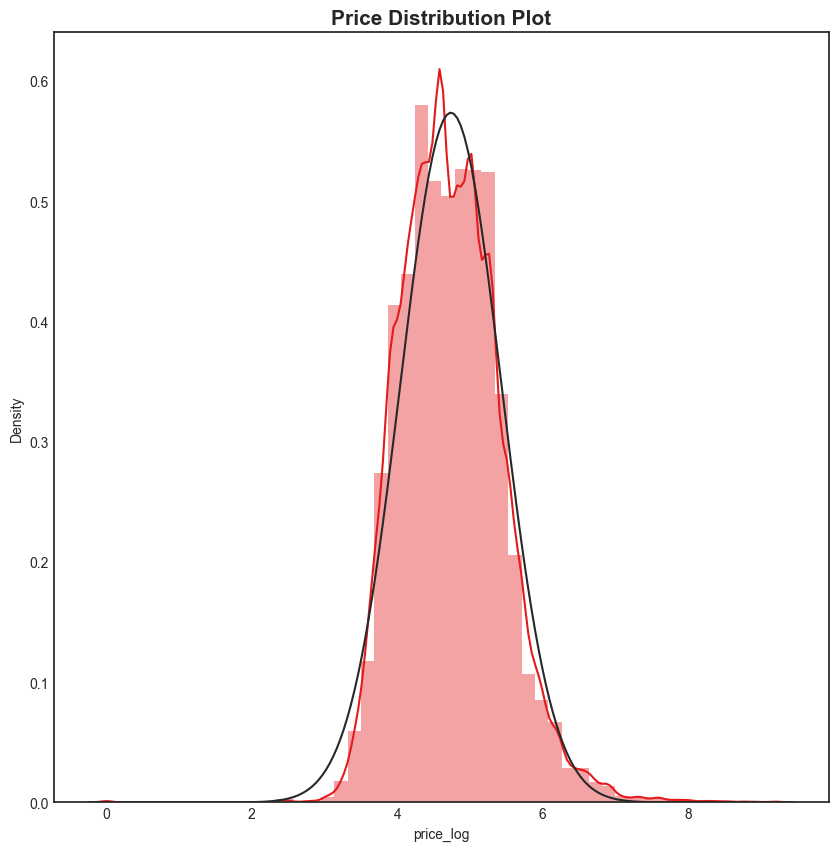

In [137]:
plt.figure(figsize=(10,10))
sns.distplot(df['price_log'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

### 3.c) Visualizing and dealing with outliers

/var/folders/7_/m8tf5s7d4bz_k2fcgvs7r_wr0000gn/T/ipykernel_79418/1952945779.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'reviews_per_month')

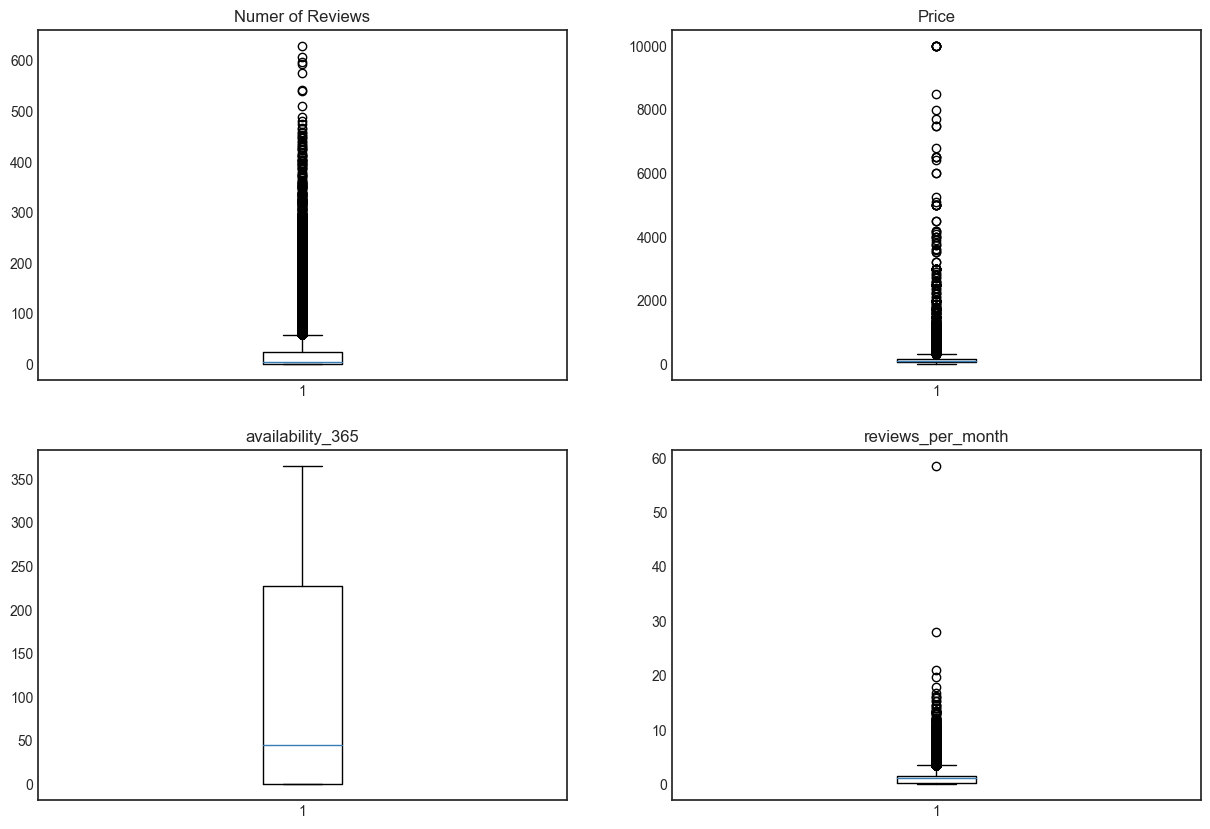

In [138]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(df['number_of_reviews'])
ax.set_title('Numer of Reviews')
ax=plt.subplot(222)
plt.boxplot(df['price'])
ax.set_title('Price')
ax=plt.subplot(223)
plt.boxplot(df['availability_365'])
ax.set_title('availability_365')
ax=plt.subplot(224)
plt.boxplot(df['reviews_per_month'])
ax.set_title('reviews_per_month')

All variables except availability_365 have a lot of outliers. We will get rid of them by using the inter quantile range in order to simplify our analysis 

In [139]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 *IQR)
df1=df.loc[filter]

Q1 = df1['number_of_reviews'].quantile(0.25)
Q3 = df1['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df1['number_of_reviews'] >= Q1 - 1.5 * IQR) & (df1['number_of_reviews'] <= Q3 + 1.5 *IQR)
df2=df1.loc[filter]


Q1 = df2['reviews_per_month'].quantile(0.25)
Q3 = df2['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df2['reviews_per_month'] >= Q1 - 1.5 * IQR) & (df2['reviews_per_month'] <= Q3 + 1.5 *IQR)
df_new=df2.loc[filter]

/var/folders/7_/m8tf5s7d4bz_k2fcgvs7r_wr0000gn/T/ipykernel_79418/3392737180.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'reviews_per_month')

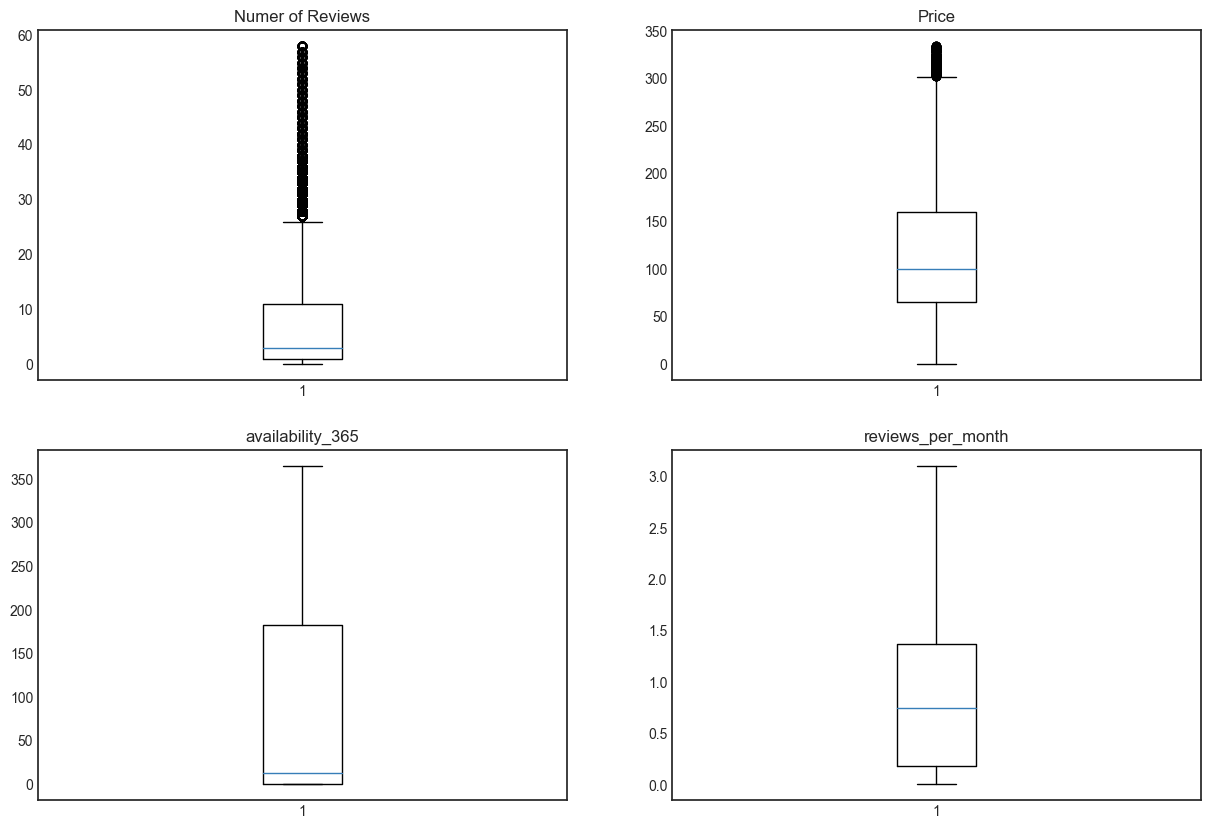

In [140]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(df_new['number_of_reviews'])
ax.set_title('Numer of Reviews')
ax=plt.subplot(222)
plt.boxplot(df_new['price'])
ax.set_title('Price')
ax=plt.subplot(223)
plt.boxplot(df_new['availability_365'])
ax.set_title('availability_365')
ax=plt.subplot(224)
plt.boxplot(df_new['reviews_per_month'])
ax.set_title('reviews_per_month')

# 4. Data Exploratory Analysis


This graph will enable us to count categorical variables with bar charts

/var/folders/7_/m8tf5s7d4bz_k2fcgvs7r_wr0000gn/T/ipykernel_79418/904074883.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


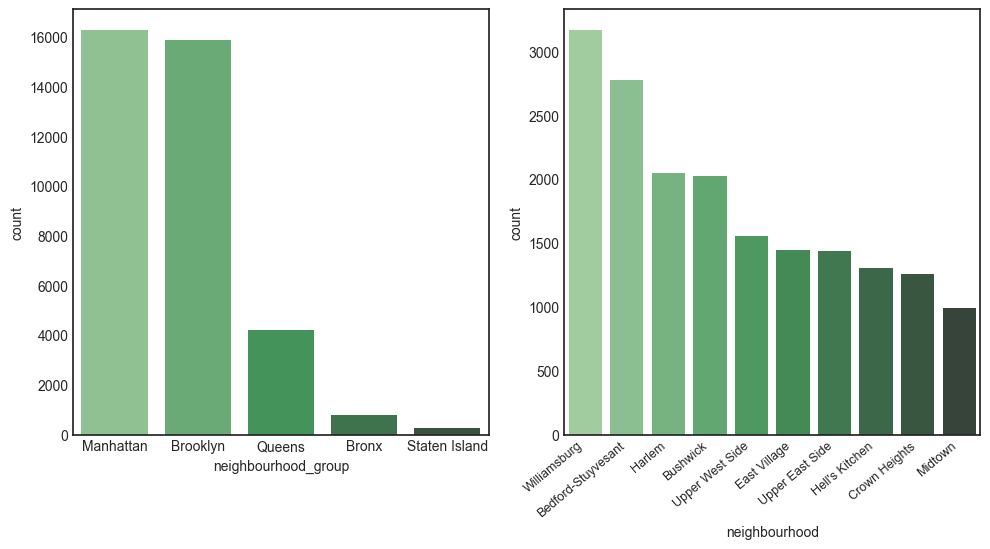

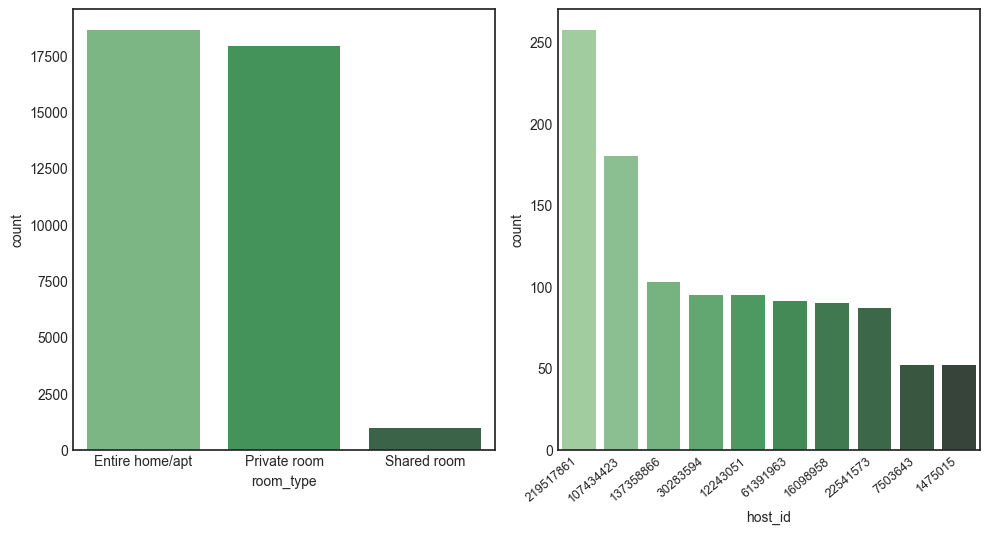

In [141]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
#Neighbourhood group
plt.subplot(221)
sns.countplot(x="neighbourhood_group", data=df_new, palette="Greens_d",
              order=df_new.neighbourhood_group.value_counts().index)
fig = plt.gcf()
fig.set_size_inches(10,10)

#Top 10 Neighbourhood
plt.subplot(222)
ax=sns.countplot(x="neighbourhood", data=df_new, palette="Greens_d",
              order=df_new.neighbourhood.value_counts().iloc[:10].index)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.tight_layout()
plt.show()

#Room type
plt.subplot(223)
sns.countplot(x="room_type", data=df_new, palette="Greens_d",
              order=df_new.room_type.value_counts().index)
fig = plt.gcf()
fig.set_size_inches(10,10)

#Top 10 hosts
plt.subplot(224)
ax=sns.countplot(x="host_id", data=df_new, palette="Greens_d",
              order=df_new.host_id.value_counts().iloc[:10].index)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.tight_layout()
plt.show()


When looking at the location-based on the neighborhood group, Manhattan and Brooklyn are ranked first and second, respectively, based on the size and the number of people who have booked a room. Following them in rank are Queens, Bronx, and Staten Island. Additionally, the top 10 areas based on neighborhood are also displayed, with Williamsburg ranking first with almost 3000 bookings.

In terms of the type of room booked, most bookings were for entire homes, with private and shared rooms being less common. Finally, the user with the highest number of bookings is associated with the host ID 219517861, making them the best customer of Airbnb in New York.

/var/folders/7_/m8tf5s7d4bz_k2fcgvs7r_wr0000gn/T/ipykernel_79418/2033567502.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


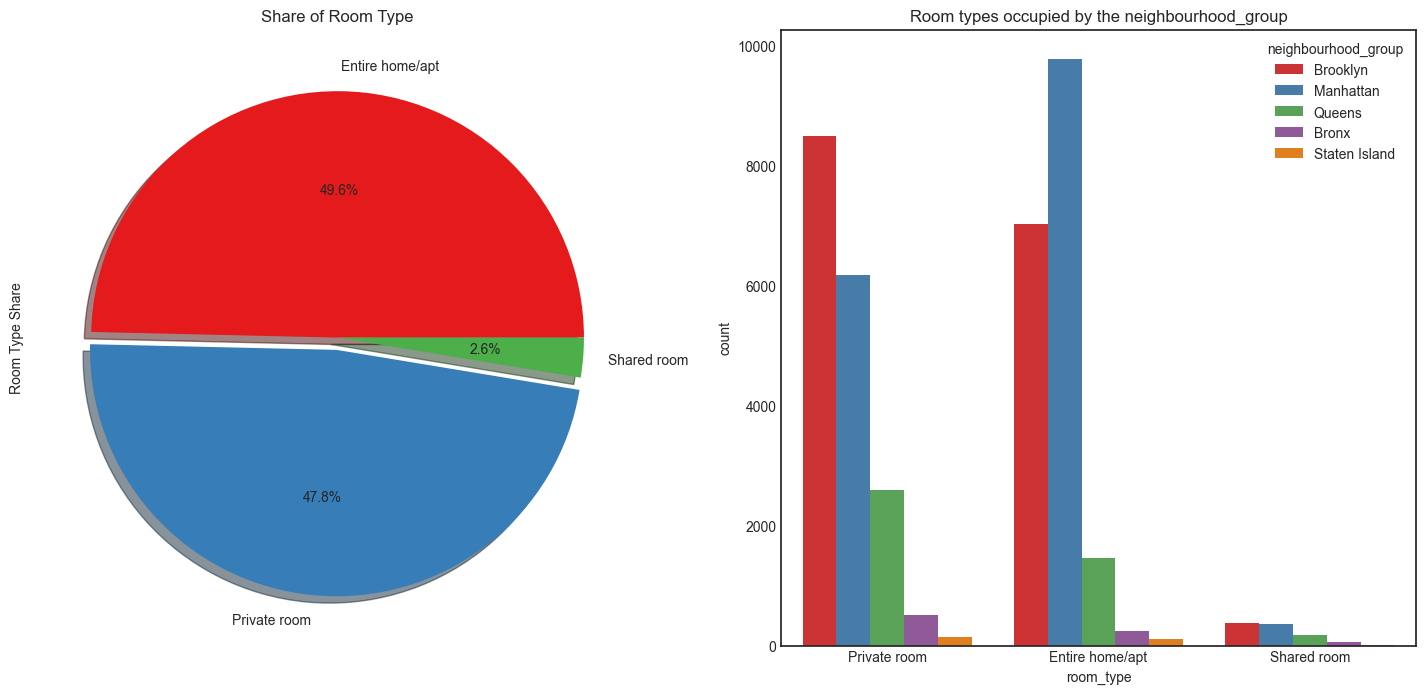

In [142]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
df_new['room_type'].value_counts().plot.pie(explode=[0,0.05,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Room Type')
ax[0].set_ylabel('Room Type Share')
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = df_new)
ax[1].set_title('Room types occupied by the neighbourhood_group')
plt.show()

From the graph above, we can state that shared rooms are very less prefered compared to the other room types. 
In Brooklyn, guests tend to book private rooms while in Manhattan, they would rather book entire homes and appartments.

The next graph is about relationship between price and room type. Shared room prices are always lower than $2000 while private rooms and entire homes have the highest prices. We decided to keep outliers for the following graphs in order to have more insights on airbnb properties

Text(0.5, 1.0, 'Room Type vs Price')

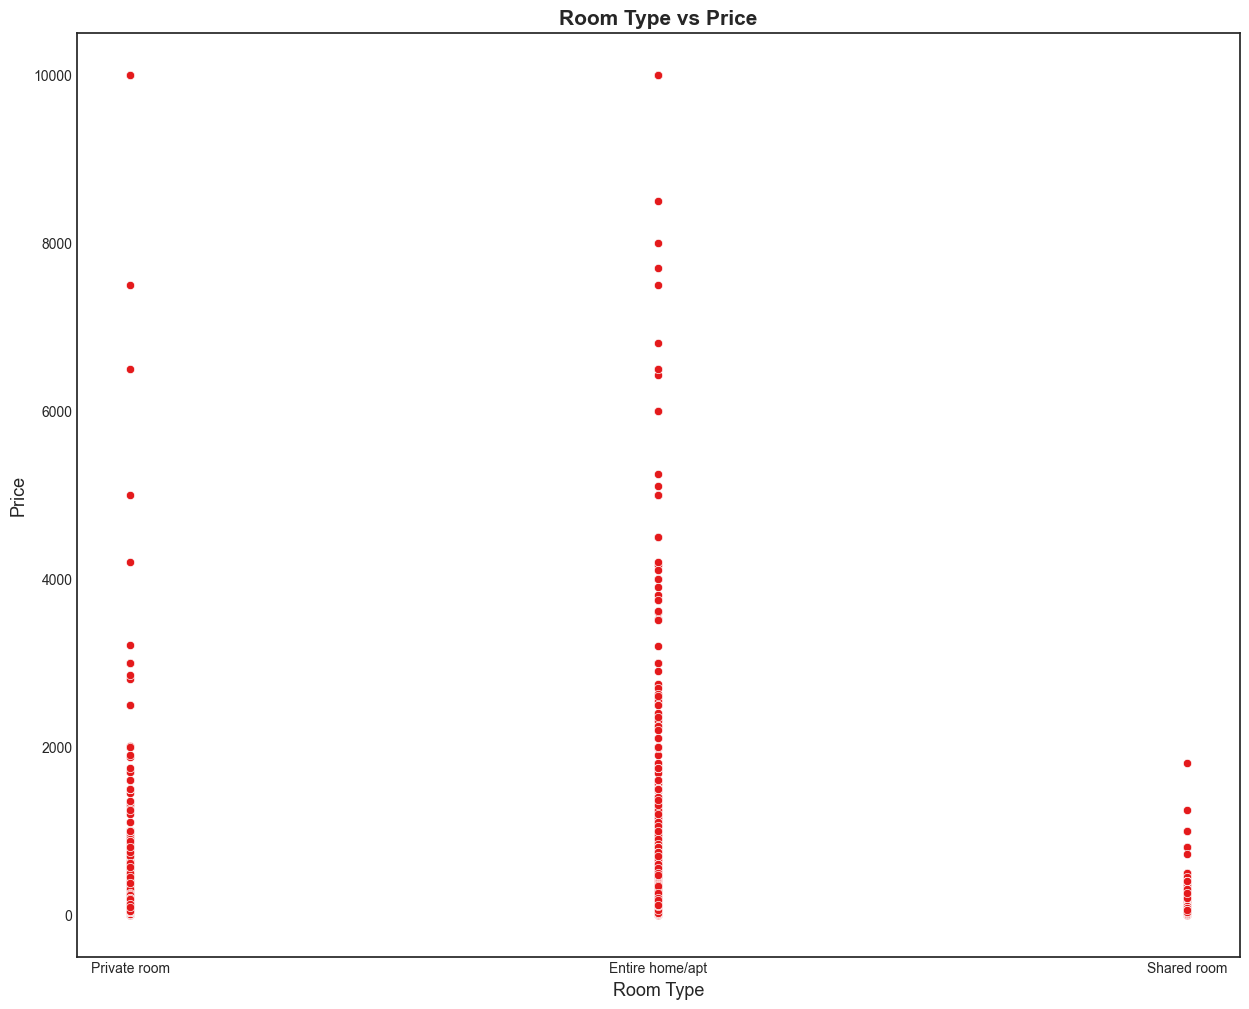

In [143]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type', y='price', data=df)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

The next graph depicts the relationship between neighborhood group, room type, and price. In Manhattan, the Private Room and Entire Home/Apt have the highest prices, while Brooklyn boasts very high prices for both room types. In contrast, the highest price for a shared room is found in the Queens area.


Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

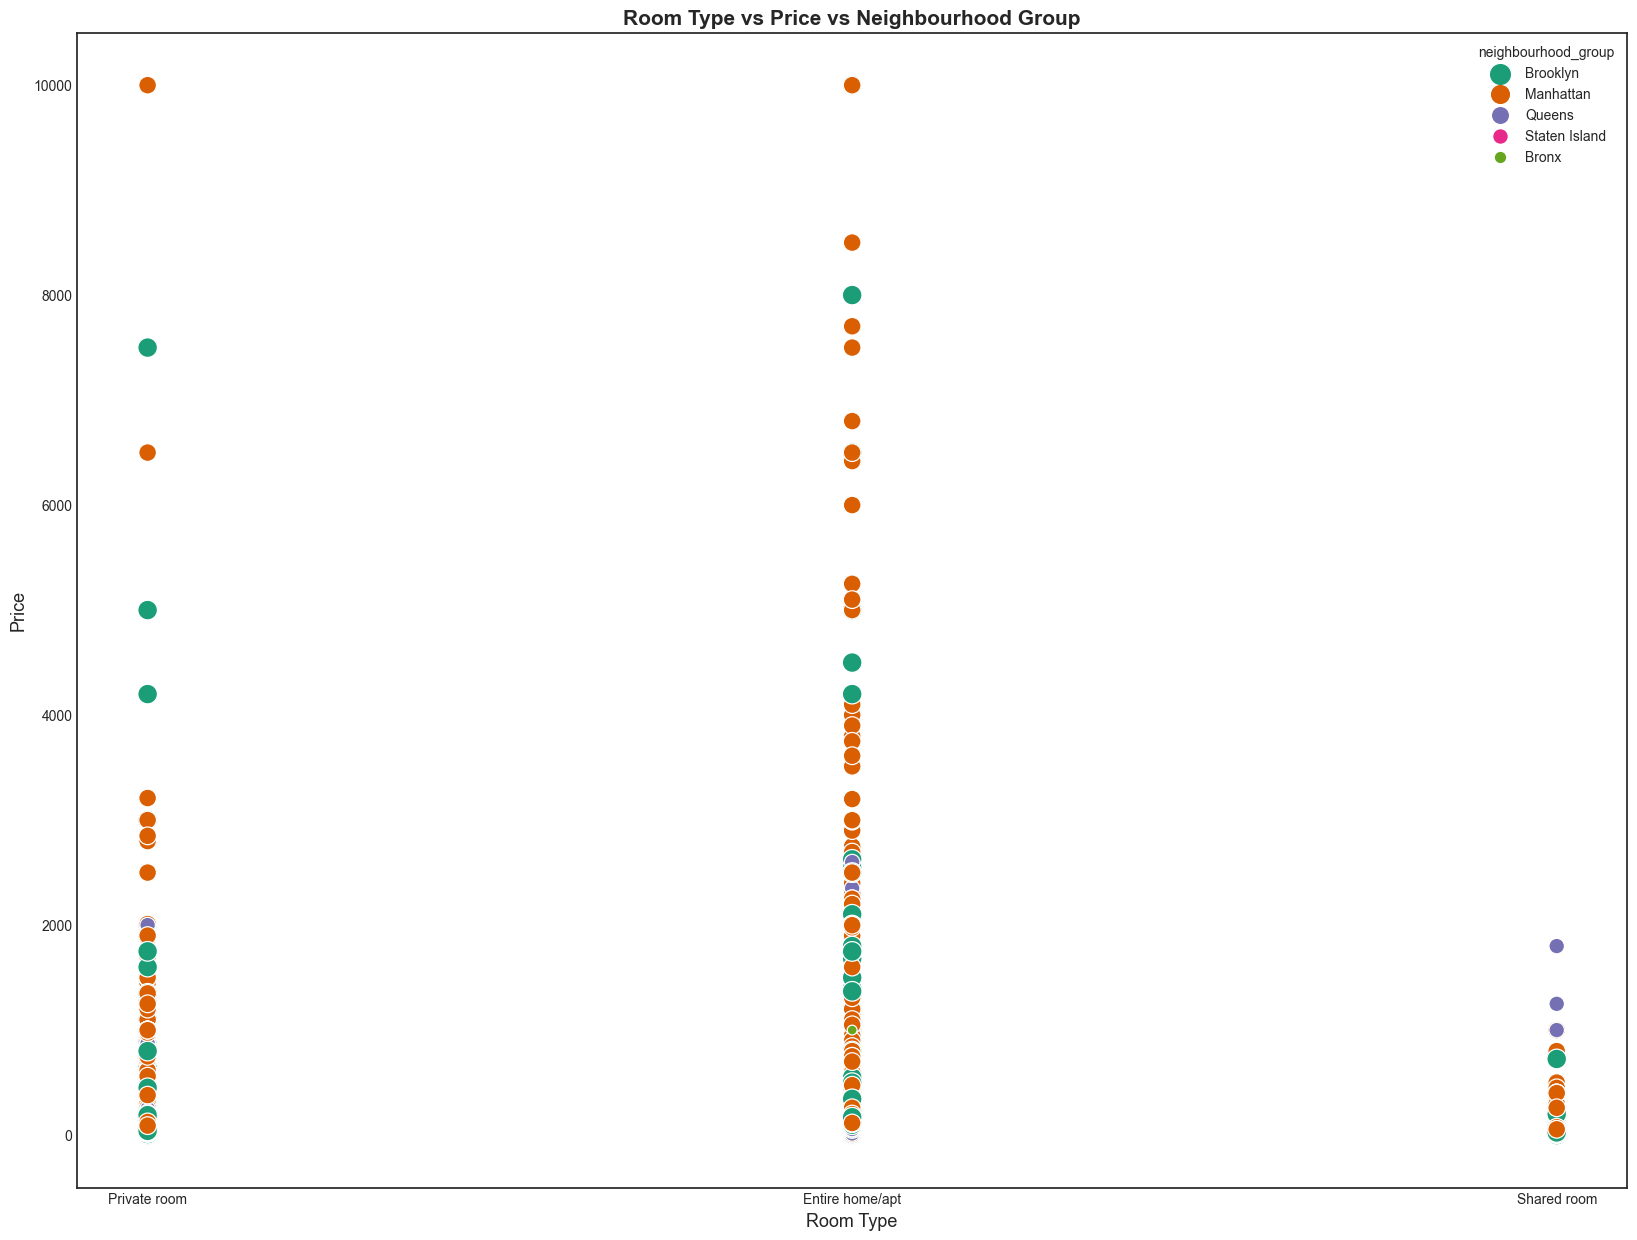

In [144]:
plt.figure(figsize=(20,15))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=df)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')

The next graph displays the correlation between the price and the number of reviews in each neighborhood group. Surprisingly, the graph demonstrates that lower-priced accommodations have received more reviews than higher-priced ones, revealing a negative correlation between price and the number of reviews. Moreover, the Manhattan, Brooklyn, and Queens areas have significantly higher review counts than other areas.





Text(0.5, 1.0, 'Price vs Number of Reviews vs Neighbourhood Group')

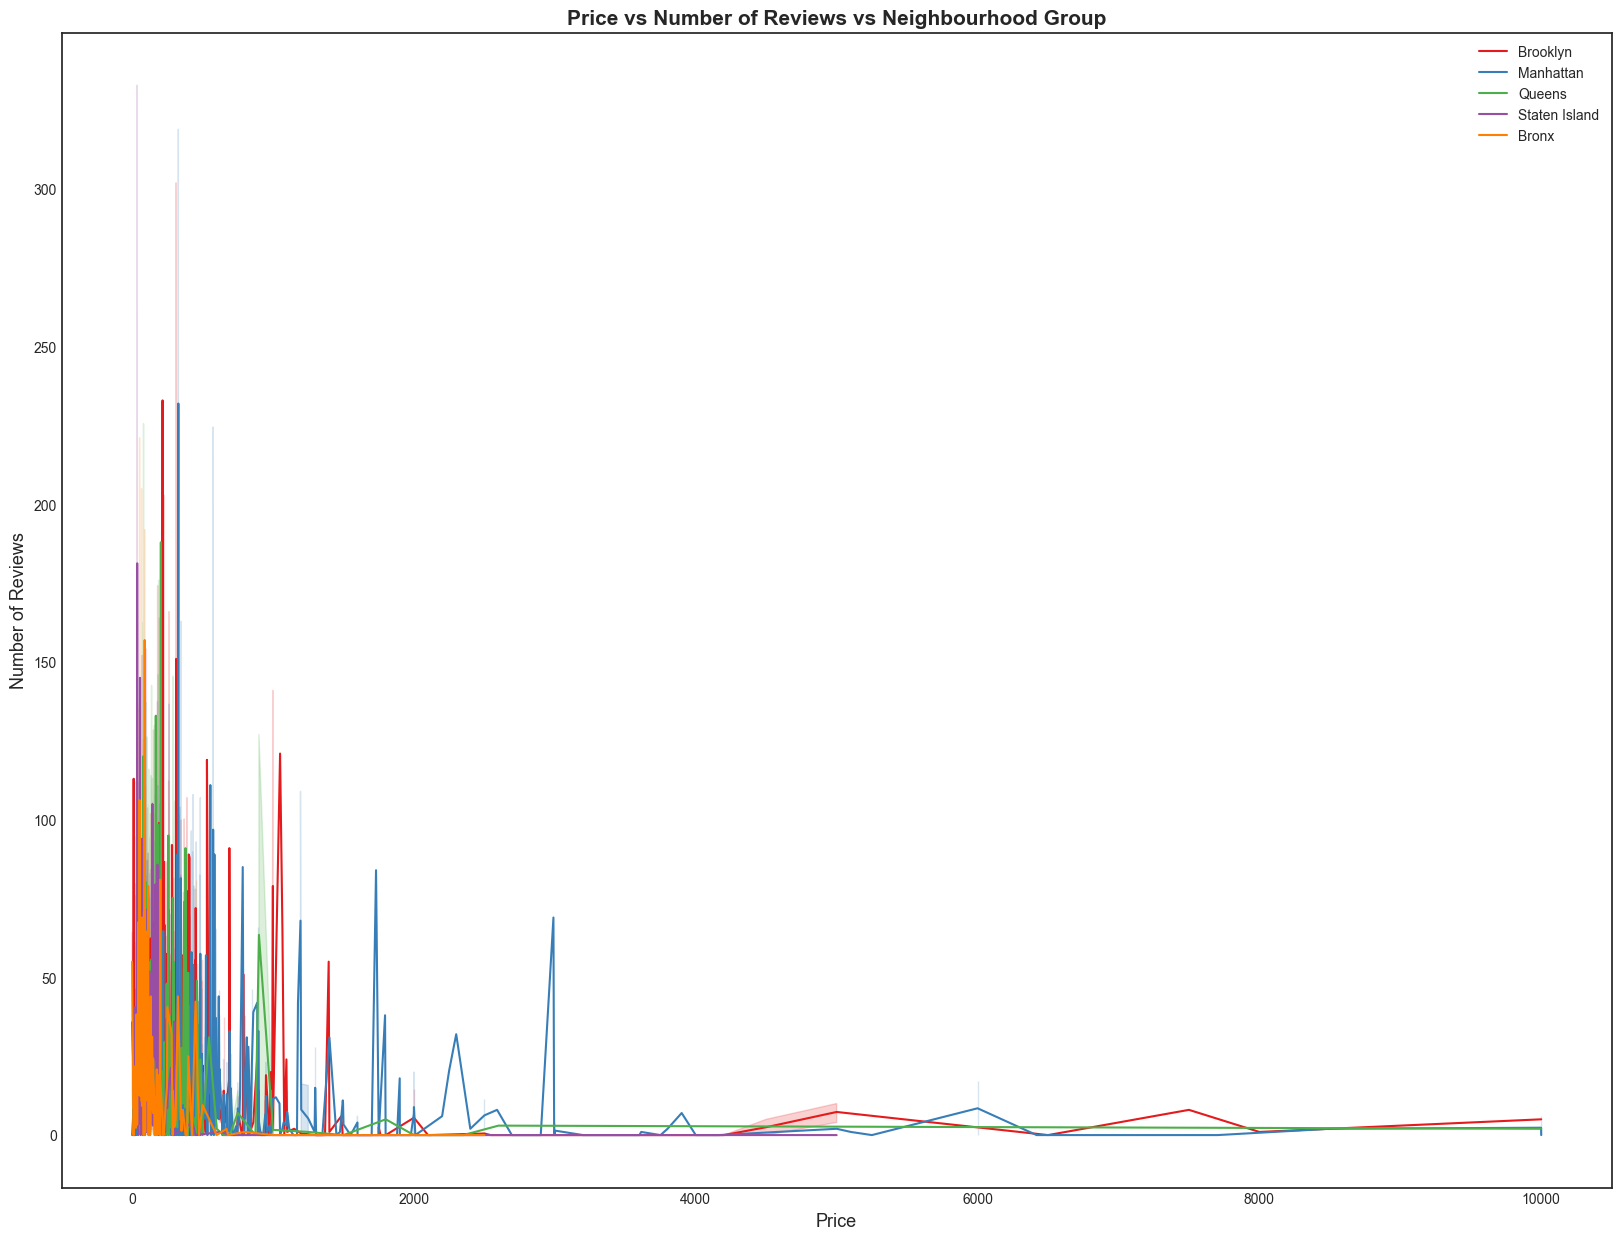

In [145]:
plt.figure(figsize=(20,15))
sns.set_palette("Set1")

sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Brooklyn'],
             label='Brooklyn')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Manhattan'],
             label='Manhattan')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Queens'],
             label='Queens')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Staten Island'],
             label='Staten Island')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Bronx'],
             label='Bronx')
plt.xlabel("Price", size=13)
plt.ylabel("Number of Reviews", size=13)
plt.title("Price vs Number of Reviews vs Neighbourhood Group",size=15, weight='bold')

/var/folders/7_/m8tf5s7d4bz_k2fcgvs7r_wr0000gn/T/ipykernel_79418/3741835151.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


<Axes: xlabel='latitude', ylabel='longitude'>

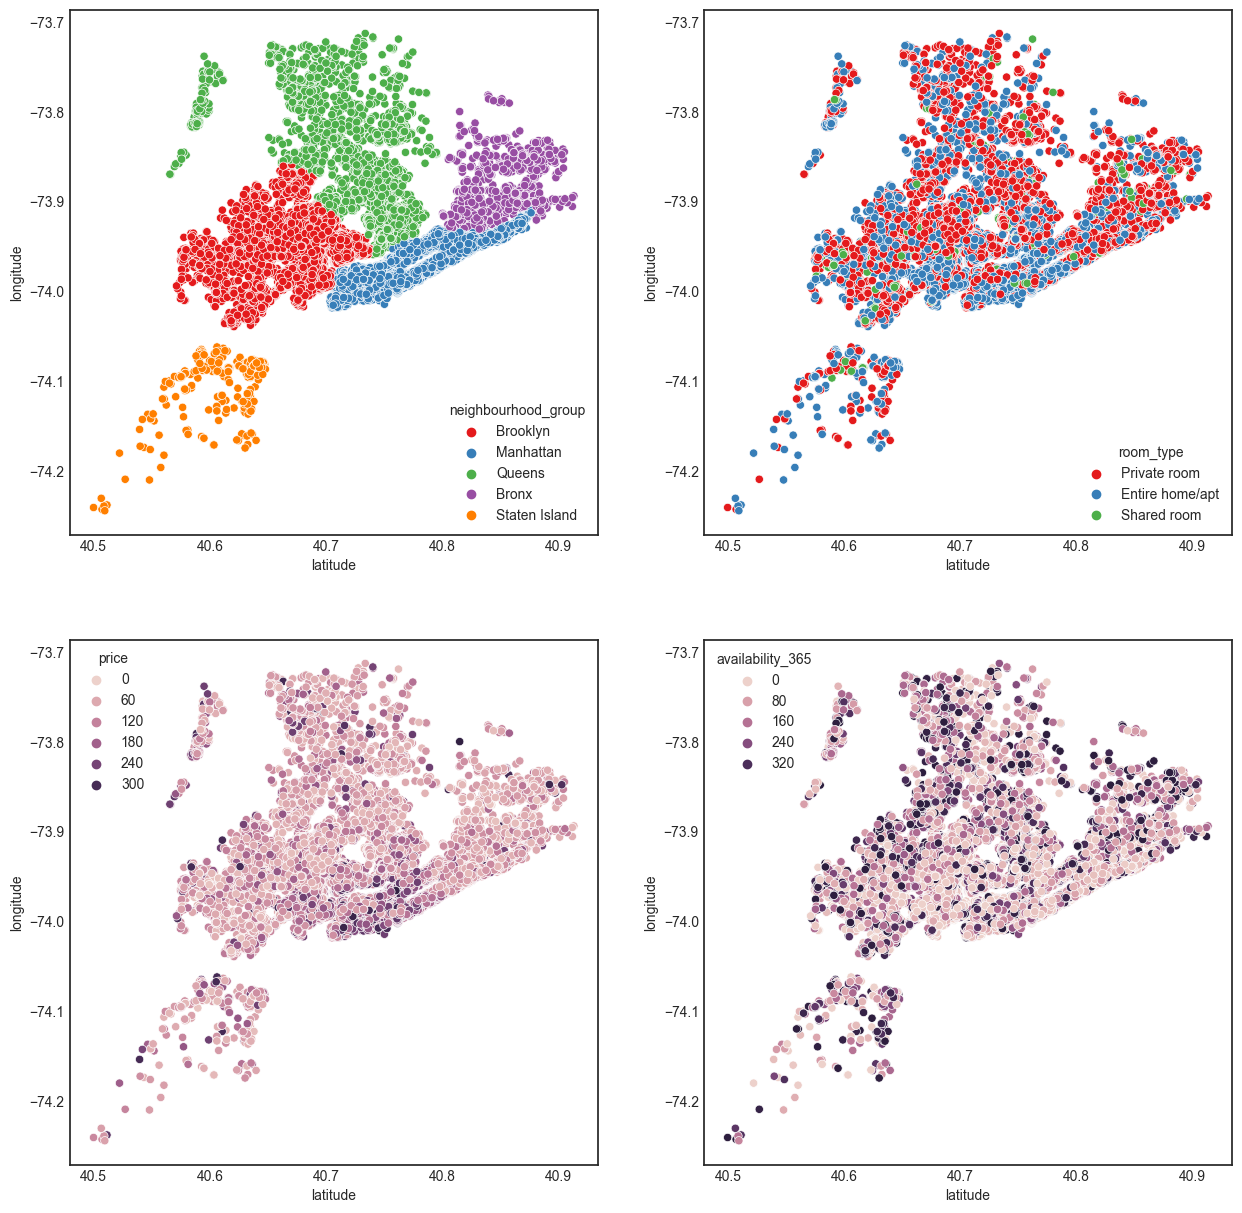

In [146]:
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
plt.subplot(221)
sns.scatterplot(x="latitude", y="longitude",hue="neighbourhood_group", data=df_new)
plt.subplot(222)
sns.scatterplot(x="latitude", y="longitude",hue="room_type", data=df_new)
plt.subplot(223)
sns.scatterplot(x="latitude", y="longitude",hue="price", data=df_new)
plt.subplot(224)
sns.scatterplot(x="latitude", y="longitude",hue="availability_365", data=df_new)

From the top corner right plot, we can infer that shared rooms represent a small proportions of the room types, as we said earlier. 

On the bottom left corner graph, we can infer that most of the expensives properties are located in Manhattan. 

Finally, from the last graph on the bottom right corner graph, we can say that there is more availability for airbnb bookings on all the boroughs of New York, except Manhattan where probably most of the tourists book their stay. 


Let us consider that a airbnb host with more than 50 reviews is considered as a top host. The following graph shows the locations of the top hosts 

In [147]:
geopandas

NameError: name 'geopandas' is not defined

In [ ]:
import geopandas as gpd
import math
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

number_of_reviews = df_new[(df_new.number_of_reviews.isin(range(50,58)))]
# Creating a map
m_2 = folium.Map(location=[40.7128,-74.0060], tiles='cartodbpositron', zoom_start=13)

# Adding points to the map
for idx, row in number_of_reviews.iterrows():
    Marker([row['latitude'], row['longitude']]).add_to(m_2)

# Displaying the map
m_2

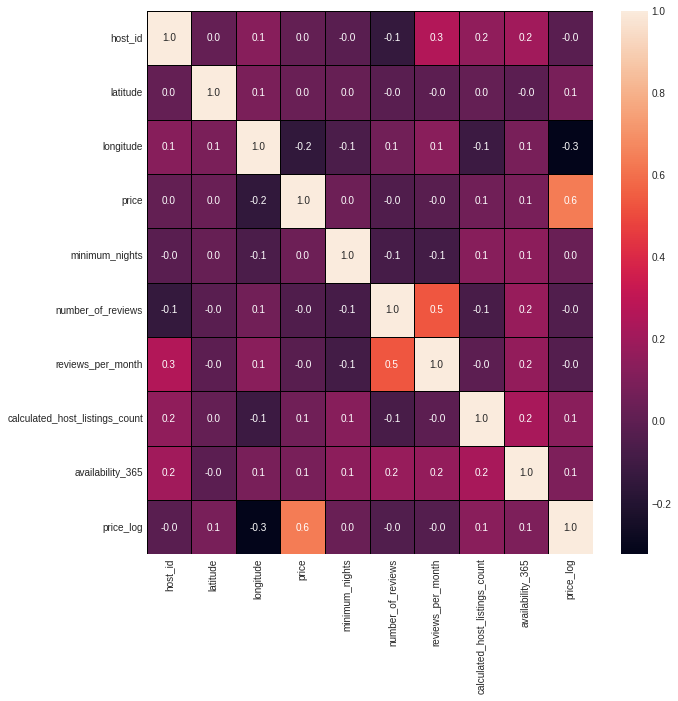

In [ ]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

From this map, we can say that in general the variables are not strongly correlated. Only number_of_reviews and reviews_per_month have a positive correlation. 

In [ ]:
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_log
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365,5.010635
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,5.420535
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1.373221,1,365,5.017280
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,4.499810
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0,4.394449


We can now select our features for the modelling part

# 5. Feature selection and modelling

## 5.a) Feature selection

In [148]:
df_features=df_new[['latitude','longitude','neighbourhood_group','room_type','availability_365','minimum_nights','calculated_host_listings_count','reviews_per_month','number_of_reviews']]
df_features.head()

,latitude,longitude,neighbourhood_group,room_type,availability_365,minimum_nights,calculated_host_listings_count,reviews_per_month,number_of_reviews
0,40.64749,-73.97237,Brooklyn,Private room,365,1,6,0.210000,9
1,40.75362,-73.98377,Manhattan,Entire home/apt,355,1,2,0.380000,45
2,40.80902,-73.94190,Manhattan,Private room,365,3,1,1.373221,0
4,40.79851,-73.94399,Manhattan,Entire home/apt,0,10,1,0.100000,9
6,40.68688,-73.95596,Brooklyn,Private room,0,45,1,0.400000,49


In [149]:
# Calculate the total number of reviews per neighbourhood
reviews_per_neighbourhood = df_features.groupby('neighbourhood_group')['number_of_reviews'].sum()

# Calculate the total number of listings per neighbourhood
listings_per_neighbourhood = df_features.groupby('neighbourhood_group').size()

# Calculate the average number of reviews per month per neighbourhood
avg_reviews_per_month_per_neighbourhood = reviews_per_neighbourhood / (30 * listings_per_neighbourhood)

# Create a new feature "Neighbourhood popularity"
df_features['neighbourhood_popularity'] = df_features['neighbourhood_group'].map(avg_reviews_per_month_per_neighbourhood)

# Print the first five rows of the dataframe to verify the new feature
df_features.head()

/var/folders/7_/m8tf5s7d4bz_k2fcgvs7r_wr0000gn/T/ipykernel_79418/4239976737.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['neighbourhood_popularity'] = df_features['neighbourhood_group'].map(avg_reviews_per_month_per_neighbourhood)


,latitude,longitude,neighbourhood_group,room_type,availability_365,minimum_nights,calculated_host_listings_count,reviews_per_month,number_of_reviews,neighbourhood_popularity
0,40.64749,-73.97237,Brooklyn,Private room,365,1,6,0.210000,9,0.303267
1,40.75362,-73.98377,Manhattan,Entire home/apt,355,1,2,0.380000,45,0.269883
2,40.80902,-73.94190,Manhattan,Private room,365,3,1,1.373221,0,0.269883
4,40.79851,-73.94399,Manhattan,Entire home/apt,0,10,1,0.100000,9,0.269883
6,40.68688,-73.95596,Brooklyn,Private room,0,45,1,0.400000,49,0.303267


As neighbourhood_group and room_type are categorical variables, we will encode them thanks to pandas get_dummies function

In [150]:
dummy_neighbourhood=pd.get_dummies(df_features['neighbourhood_group'], prefix='dummy')
dummy_roomtype=pd.get_dummies(df_features['room_type'], prefix='dummy')
df_features = pd.concat([df_features,dummy_neighbourhood,dummy_roomtype],axis=1)
df_features.drop(['neighbourhood_group','room_type'],axis=1, inplace=True)
df_features

,latitude,longitude,availability_365,minimum_nights,calculated_host_listings_count,reviews_per_month,number_of_reviews,neighbourhood_popularity,dummy_Bronx,dummy_Brooklyn,dummy_Manhattan,dummy_Queens,dummy_Staten Island,dummy_Entire home/apt,dummy_Private room,dummy_Shared room
0,40.64749,-73.97237,365,1,6,0.210000,9,0.303267,0,1,0,0,0,0,1,0
1,40.75362,-73.98377,355,1,2,0.380000,45,0.269883,0,0,1,0,0,1,0,0
2,40.80902,-73.94190,365,3,1,1.373221,0,0.269883,0,0,1,0,0,0,1,0
4,40.79851,-73.94399,0,10,1,0.100000,9,0.269883,0,0,1,0,0,1,0,0
6,40.68688,-73.95596,0,45,1,0.400000,49,0.303267,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,9,2,2,1.373221,0,0.303267,0,1,0,0,0,0,1,0
48891,40.70184,-73.93317,36,4,2,1.373221,0,0.303267,0,1,0,0,0,0,1,0
48892,40.81475,-73.94867,27,10,1,1.373221,0,0.269883,0,0,1,0,0,1,0,0
48893,40.75751,-73.99112,2,1,6,1.373221,0,0.269883,0,0,1,0,0,0,0,1


In [151]:
import pandas as pd
from math import radians, cos, sin, asin, sqrt

# Define the latitude and longitude of Wall Street
wall_street_lat = 40.7079
wall_street_lon = -74.0113

# Define a function to calculate the distance between two points using Haversine formula
def haversine(lon1, lat1, lon2, lat2):
    # Convert degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

# Create a new column 'distance_to_wall_street' in the DataFrame
df_features['distance_to_wall_street'] = df_features.apply(lambda row: haversine(row['longitude'], row['latitude'], wall_street_lon, wall_street_lat), axis=1)

# Print the updated DataFrame
df_features

,latitude,longitude,availability_365,minimum_nights,calculated_host_listings_count,reviews_per_month,number_of_reviews,neighbourhood_popularity,dummy_Bronx,dummy_Brooklyn,dummy_Manhattan,dummy_Queens,dummy_Staten Island,dummy_Entire home/apt,dummy_Private room,dummy_Shared room,distance_to_wall_street
0,40.64749,-73.97237,365,1,6,0.210000,9,0.303267,0,1,0,0,0,0,1,0,7.476598
1,40.75362,-73.98377,355,1,2,0.380000,45,0.269883,0,0,1,0,0,1,0,0,5.588066
2,40.80902,-73.94190,365,3,1,1.373221,0,0.269883,0,0,1,0,0,0,1,0,12.672651
4,40.79851,-73.94399,0,10,1,0.100000,9,0.269883,0,0,1,0,0,1,0,0,11.561103
6,40.68688,-73.95596,0,45,1,0.400000,49,0.303267,0,1,0,0,0,0,1,0,5.218127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,9,2,2,1.373221,0,0.303267,0,1,0,0,0,0,1,0,6.117096
48891,40.70184,-73.93317,36,4,2,1.373221,0,0.303267,0,1,0,0,0,0,1,0,6.620314
48892,40.81475,-73.94867,27,10,1,1.373221,0,0.269883,0,0,1,0,0,1,0,0,12.999493
48893,40.75751,-73.99112,2,1,6,1.373221,0,0.269883,0,0,1,0,0,0,0,1,5.772491


We define price_log as our target variable

In [152]:
df_target = df_new['price_log']
df_target.head()

0    5.010635
1    5.420535
2    5.017280
4    4.394449
6    4.110874
Name: price_log, dtype: float64

In [153]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37505 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        37505 non-null  float64
 1   longitude                       37505 non-null  float64
 2   availability_365                37505 non-null  int64  
 3   minimum_nights                  37505 non-null  int64  
 4   calculated_host_listings_count  37505 non-null  int64  
 5   reviews_per_month               37505 non-null  float64
 6   number_of_reviews               37505 non-null  int64  
 7   neighbourhood_popularity        37505 non-null  float64
 8   dummy_Bronx                     37505 non-null  uint8  
 9   dummy_Brooklyn                  37505 non-null  uint8  
 10  dummy_Manhattan                 37505 non-null  uint8  
 11  dummy_Queens                    37505 non-null  uint8  
 12  dummy_Staten Island             

In [154]:
#Now we move to leveraging the name description

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

#We clean the name description and remove stopwords
def name_cleaning(s_):
    s_ = str(s_)
    modified_str = [elem.lower() for elem in s_.split(' ') if elem.lower() not in stop_words] 

    return(modified_str) 

#create a new variable with a list of cleaned words

df['name_list']=df.name.apply(lambda x: name_cleaning(x))

df['name_list'].head(5)

0                   [clean, &, quiet, apt, home, park]
1                            [skylit, midtown, castle]
2                    [village, harlem....new, york, !]
3                    [cozy, entire, floor, brownstone]
4    [entire, apt:, spacious, studio/loft, central,...
Name: name_list, dtype: object

In [155]:
#We append all those entries into a global list where all words are referenced.
Tot=[]

df.name_list.apply(lambda x: Tot.append(x))
all_words=[elem for sublist in Tot for elem in sublist]

all_words[:20]


['clean',
 '&',
 'quiet',
 'apt',
 'home',
 'park',
 'skylit',
 'midtown',
 'castle',
 'village',
 'harlem....new',
 'york',
 '!',
 'cozy',
 'entire',
 'floor',
 'brownstone',
 'entire',
 'apt:',
 'spacious']

In [156]:
#We create a function that counts the names in the list and keeps the 60 most occuring ones.
from collections import Counter
def find_most_common_words(liste, num_words):
    word_counts = Counter(liste)
    return [word for word, count in word_counts.most_common(num_words)]

top_60=find_most_common_words(all_words, 60)

top_60 = [elem for elem in top_60 if elem != 'w/' and elem!= '|' and elem != '' and elem!= '&' and elem != '+']
print(top_60)

#make another column that only has as entries the words in the top 60 most occuring ones
def checkingrecu(liste):
    important_words=[elem for elem in liste if elem in top_60]
    return important_words

df['most_recu_words']=df.name_list.apply(lambda x: checkingrecu(x))

['room', 'bedroom', 'private', 'apartment', 'cozy', 'studio', 'brooklyn', 'apt', 'spacious', '1', '2', 'east', 'manhattan', 'park', 'sunny', 'beautiful', 'williamsburg', 'near', '-', 'village', 'heart', 'large', 'loft', 'nyc', 'central', 'modern', 'home', 'luxury', 'west', '1br', 'new', 'bright', 'bed', 'upper', 'charming', 'side', 'one', 'midtown', 'great', 'bushwick', 'brownstone', 'br', 'location', 'quiet', 'close', 'harlem', '3', 'huge', 'garden', 'square', 'clean', 'times', 'heights', 'prime', 'duplex']


In [157]:
#Then, we create a one hot encoding with each column being one of the top 60 most occuring words
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

df = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df.pop('most_recu_words')),
                index=df.index,
                columns=mlb.classes_))

/var/folders/7_/m8tf5s7d4bz_k2fcgvs7r_wr0000gn/T/ipykernel_79418/2516405157.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[features[-59:]].corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)


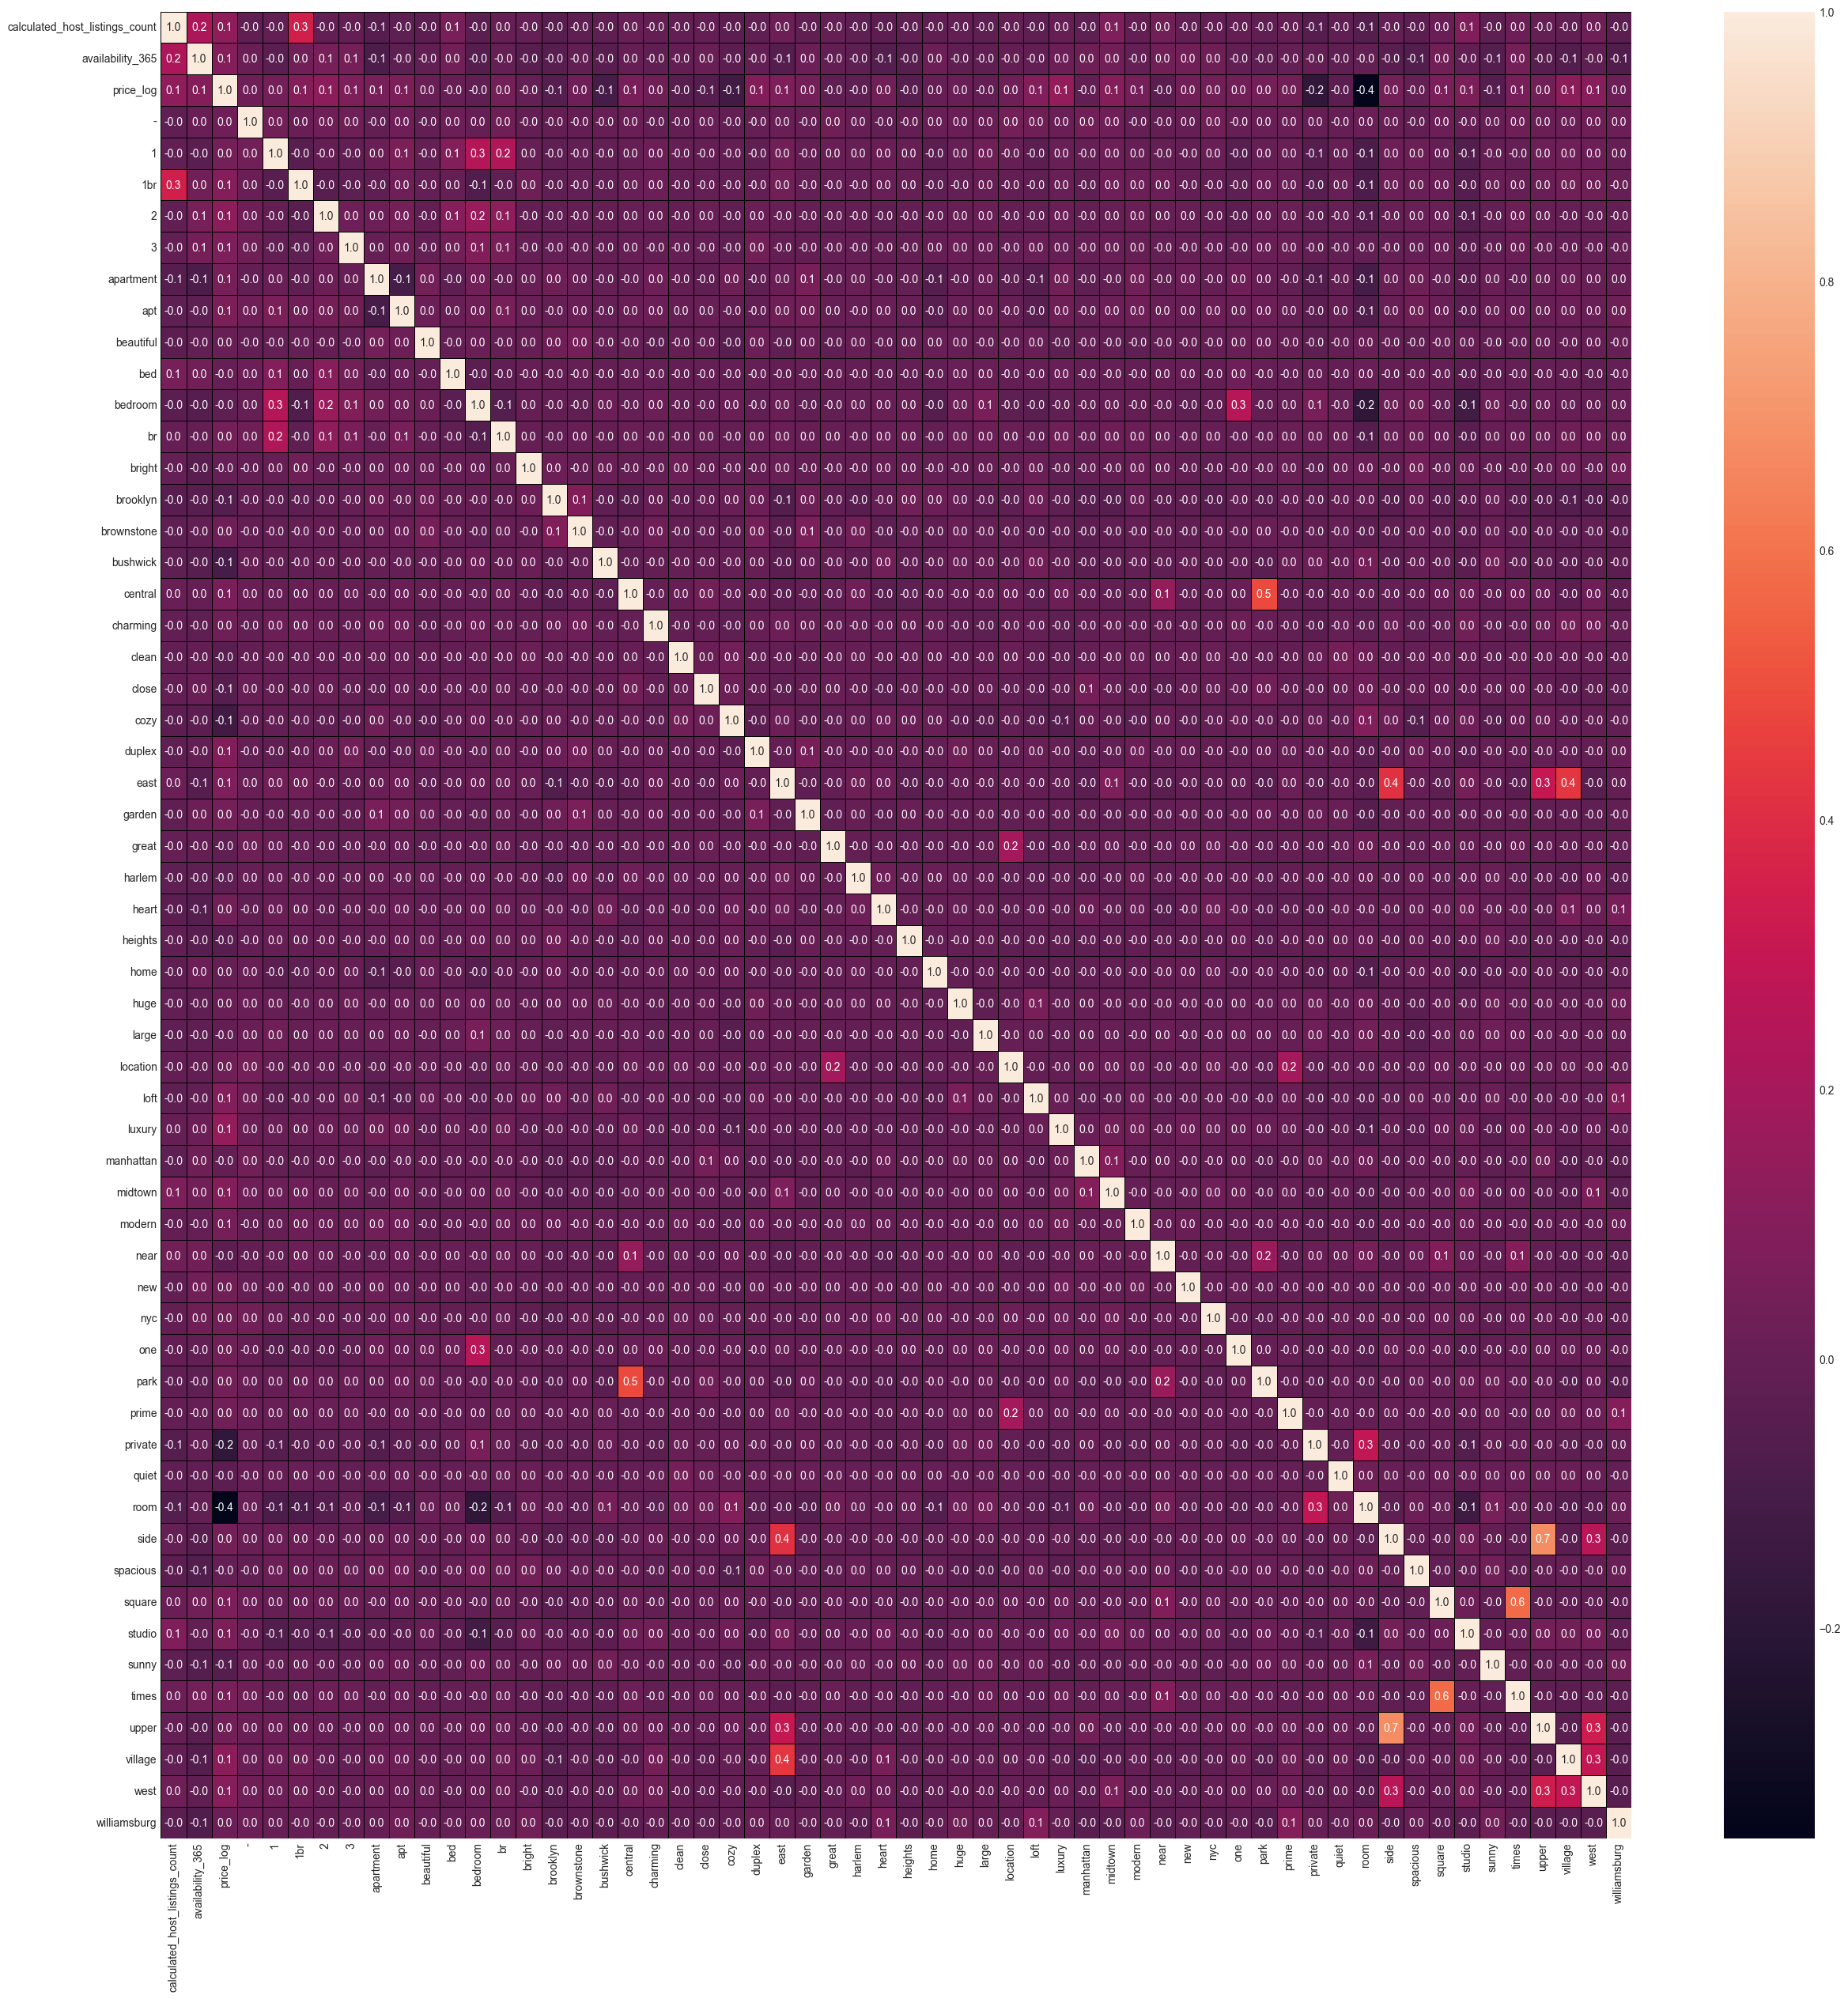

In [158]:
#We check the correlation between each of those dummy variables representing the occurence of one of the top 60 words in the name description, with the target value price log
features=df.columns.tolist()
f,ax=plt.subplots(figsize=(30,30))
sns.heatmap(df[features[-59:]].corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()


In [159]:
#To make it more precise we take the absolute value of the correlation of each variable with the price log
correlations=df.corrwith(df['price_log']).tolist()
print(correlations)

correlation_tuple=[]
for i in range(len(correlations)):
    correlation_tuple.append((abs(correlations[i]), features[i]))

print(correlation_tuple)

print(sorted(correlation_tuple, reverse=True))

#this gives us the most correlated features with respect to the price log. We decide to select the 10 most correlated name variables.

[-0.016689685168806253, 0.07933858260755787, -0.32504328503246904, 0.6376692017192014, 0.03318524508527818, -0.0428007421909185, -0.033480973990113745, 0.13227372054690464, 0.09855794590949492, 0.9999999999999999, 0.026106805897119983, 0.04337866094640788, 0.09427936171814671, 0.1156767248153242, 0.07579355837659099, 0.05592299068123604, 0.07062235064294185, 0.004696360327227832, -0.0010265969869969124, -0.021359246778763004, 0.04388503419554534, -0.0016164759838360793, -0.05603656543024174, 0.02900484525456064, -0.10250109439112089, 0.060897995379534726, 0.021638056728495975, -0.04511088719975413, -0.052058231376798436, -0.11888064695161313, 0.08705392869580544, 0.0767445721806951, 0.044373350641086794, -0.01774498674948831, -0.024890576825875393, 0.03459439107726354, -0.03887766591205374, 0.0003323343939912143, 0.011814075048706886, -0.009050585378430127, 0.02276776711585735, 0.09237101455277305, 0.14360912442352977, -0.008220990902049353, 0.09908867302710257, 0.05019504455298794, -0

/var/folders/7_/m8tf5s7d4bz_k2fcgvs7r_wr0000gn/T/ipykernel_79418/3298034671.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations=df.corrwith(df['price_log']).tolist()


In [160]:
#those are the name variables we keep
df_features[['nyc', 'near', 'heights', 'spacious', 'brownstone', 'bed', 'square', 'huge', 'heart', 'bushwick']]= df[['nyc', 'near', 'heights', 'spacious', 'brownstone', 'bed', 'square', 'huge', 'heart', 'bushwick']]
df_features.columns.tolist()





['latitude',
 'longitude',
 'availability_365',
 'minimum_nights',
 'calculated_host_listings_count',
 'reviews_per_month',
 'number_of_reviews',
 'neighbourhood_popularity',
 'dummy_Bronx',
 'dummy_Brooklyn',
 'dummy_Manhattan',
 'dummy_Queens',
 'dummy_Staten Island',
 'dummy_Entire home/apt',
 'dummy_Private room',
 'dummy_Shared room',
 'distance_to_wall_street',
 'nyc',
 'near',
 'heights',
 'spacious',
 'brownstone',
 'bed',
 'square',
 'huge',
 'heart',
 'bushwick']

In [171]:
#We target encode the neighbourhoods
from category_encoders import TargetEncoder
df=TargetEncoder(cols=['neighbourhood'], smoothing=1.0).fit(df, df['price_log']).transform(df)

In [175]:
df_features['neighbourhood']= df['neighbourhood']



In [177]:
df_features.columns

Index(['latitude', 'longitude', 'availability_365', 'minimum_nights',
       'calculated_host_listings_count', 'reviews_per_month',
       'number_of_reviews', 'neighbourhood_popularity', 'dummy_Bronx',
       'dummy_Brooklyn', 'dummy_Manhattan', 'dummy_Queens',
       'dummy_Staten Island', 'dummy_Entire home/apt', 'dummy_Private room',
       'dummy_Shared room', 'distance_to_wall_street', 'nyc', 'near',
       'heights', 'spacious', 'brownstone', 'bed', 'square', 'huge', 'heart',
       'bushwick', 'neighbourhood'],
      dtype='object')

## 5.b) Modelling

Before splitting our features and target variable in train and test set, we normalize our data.

In [178]:
df_features.columns

Index(['latitude', 'longitude', 'availability_365', 'minimum_nights',
       'calculated_host_listings_count', 'reviews_per_month',
       'number_of_reviews', 'neighbourhood_popularity', 'dummy_Bronx',
       'dummy_Brooklyn', 'dummy_Manhattan', 'dummy_Queens',
       'dummy_Staten Island', 'dummy_Entire home/apt', 'dummy_Private room',
       'dummy_Shared room', 'distance_to_wall_street', 'nyc', 'near',
       'heights', 'spacious', 'brownstone', 'bed', 'square', 'huge', 'heart',
       'bushwick', 'neighbourhood'],
      dtype='object')

In [179]:


from sklearn import preprocessing
X=preprocessing.scale(df_features)
y= df_target
X = pd.DataFrame(X, index=df_features.index, columns=df_features.columns)
print(X)
print(y)

       latitude  longitude  availability_365  minimum_nights  \
0     -1.477995  -0.448240          2.044588       -0.316637   
1      0.451696  -0.704300          1.967902       -0.316637   
2      1.458998   0.236160          2.044588       -0.224056   
4      1.267902   0.189216         -0.754463        0.099976   
6     -0.761793  -0.079647         -0.754463        1.720141   
...         ...        ...               ...             ...   
48890 -0.913615   0.055346         -0.685445       -0.270347   
48891 -0.489785   0.432249         -0.478392       -0.177766   
48892  1.563183   0.084097         -0.547410        0.099976   
48893  0.522426  -0.869392         -0.739126       -0.316637   
48894  0.641156  -0.829186         -0.578085       -0.038895   

       calculated_host_listings_count  reviews_per_month  number_of_reviews  \
0                           -0.045440          -0.915187           0.016082   
1                           -0.164442          -0.678885           2.8750

/Users/jeanlahellec/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Our features data is not longer a dataframe. Therefore, we transform it into a pandas dataframe.

In [ ]:
X = pd.DataFrame(X)
X=X.rename(index=str, columns={0:'latitude', 1:'longitude',2:'availability_365',3:'minimum_nights',4:'calculated_host_listings_count',5:'reviews_per_month',
                             6:'number_of_reviews',7:'neighbourhood_popularity',8:'dummy_Bronx',9:'dummy_Brooklyn',10:'dummy_Manhattan',11:'dummy_Queens',12:'dummy_Staten_Island',
                             13:'dummy_Entire_home/apt',14:'dummy_Private_room',15:'dummy_Shared_room',16:'distance_to_wall_street'})
X.head()

,latitude,longitude,availability_365,minimum_nights,calculated_host_listings_count,reviews_per_month,number_of_reviews,neighbourhood_popularity,dummy_Bronx,dummy_Brooklyn,dummy_Manhattan,dummy_Queens,dummy_Staten_Island,dummy_Entire_home/apt,dummy_Private_room,dummy_Shared_room,distance_to_wall_street
0,-1.477995,-0.448240,2.044588,-0.316637,-0.045440,-0.915187,0.016082,0.417004,-0.148573,1.166442,-0.877271,-0.356685,-0.084035,-0.992747,1.045816,-0.163458,-0.077975
1,0.451696,-0.704300,1.967902,-0.316637,-0.164442,-0.678885,2.875065,-0.972754,-0.148573,-0.857308,1.139898,-0.356685,-0.084035,1.007306,-0.956191,-0.163458,-0.497846
2,1.458998,0.236160,2.044588,-0.224056,-0.194193,0.701706,-0.698663,-0.972754,-0.148573,-0.857308,1.139898,-0.356685,-0.084035,-0.992747,1.045816,-0.163458,1.077243
3,1.267902,0.189216,-0.754463,0.099976,-0.194193,-1.068088,0.016082,-0.972754,-0.148573,-0.857308,1.139898,-0.356685,-0.084035,1.007306,-0.956191,-0.163458,0.830117
4,-0.761793,-0.079647,-0.754463,1.720141,-0.194193,-0.651084,3.192730,0.417004,-0.148573,1.166442,-0.877271,-0.356685,-0.084035,-0.992747,1.045816,-0.163458,-0.580093


Then, we split the data into a 70-30 ratio

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=1)


# 3. Model Building  

Here, we define some metrics functions in order to display scores when running the models

In [181]:
#define metrics
def rsqr_score(test, pred):
    rsqr = r2_score(test, pred)
    return rsqr

def rmse_score(test, pred):
    rmse = np.sqrt(mean_squared_error(test, pred))
    return rmse

def mse_score(test, pred):
    mse = mean_squared_error(test, pred)
    return mse

def mae_score(test, pred):
    mae = mean_absolute_error(test, pred)
    return mae

def mape_score(test, pred):
  mape = mean_absolute_percentage_error(test, pred)
  return mape

In [182]:
# Print the scores
def print_score(test, pred):
    """Print calculated score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the R squared score
        print Root Mean Square Error score
        print Mean Square Error score
        print Mean Absolute Error score
    """

    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}")
    print(f"MSE: {mse_score(test, pred)}")
    print(f"MAE: {mae_score(test, pred)}")
    print(f"MAPE: {mape_score(test, pred)}")

### Decision Tree Regressor

In [183]:
from sklearn.tree import DecisionTreeRegressor
from time import time

start = time()

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

dt_pred = model.predict(X_test)

print_score(y_test, dt_pred)

print(f"{round(time()-start, 2)}sec")

R²: 0.30795234449607056
RMSE: 0.48442907940156826
MSE: 0.2346715329698509
MAE: 0.3665533658603842
MAPE: 4590225503700.345
0.38sec


#### With Parameter Tuning 

In [ ]:
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3, 5, 6, 10, 15],
           'min_samples_split': [2, 3, 5, 10, 15, 20, 500],
           'min_samples_leaf': [2,3,5, 10, 15, 20, 500]}
decisiontree = DecisionTreeRegressor()
clf = GridSearchCV(decisiontree,
                    param_grid=params,
                    scoring='neg_mean_squared_error',
                         verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 245 candidates, totalling 1225 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 2}
Lowest RMSE:  0.37075699194358475


### Random Forest

In [184]:
from sklearn.ensemble import RandomForestRegressor

start = time()

model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

rf_pred = model2.predict(X_test)

print_score(y_test, rf_pred)

print(f"{round(time()-start, 2)}sec")

R²: 0.6211802425855719
RMSE: 0.35840867686475086
MSE: 0.12845677965194138
MAE: 0.26959253068825306
MAPE: 4370125497867.2393
16.32sec


#### With Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3, 5, 6, 10, 15],
           'min_samples_split': [2, 3, 5, 10],
           'min_samples_leaf': [2,3,5, 10, 15, 20, 500]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,
                    param_grid=params,
                    scoring='neg_mean_squared_error',
                         verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 140 candidates, totalling 700 fits
Best parameters: {'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 10}
Lowest RMSE:  0.35440298513002694


### Extremely Randomized Trees Regressor

In [185]:
start = time()

model3 = ExtraTreesRegressor()
model3.fit(X_train, y_train)

extra_pred = model3.predict(X_test)

print_score(y_test, extra_pred)


print(f"{round(time()-start, 2)}sec")

R²: 0.6056808696154499
RMSE: 0.3656673024863407
MSE: 0.13371257610763698
MAE: 0.2742330692182142
MAPE: 4480055052688.953
8.65sec


### Adaboost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor


start = time()

model4 = AdaBoostRegressor()
model4.fit(X_train, y_train)

ada_pred = model4.predict(X_test)

print_score(y_test, ada_pred)


print(f"{round(time()-start, 2)}sec")


R²: 0.5096628622977275
RMSE: 0.40776467343400846
MSE: 0.16627202890074355
MAE: 0.31699165562826037
MAPE: 4895794171420.35
0.59sec


#### With Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
params = { 
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'n_estimators': [100, 500]}
ada = AdaBoostRegressor()
clf = GridSearchCV(ada,
                    param_grid=params,
                    scoring='neg_mean_squared_error',
                         verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'learning_rate': 0.01, 'n_estimators': 100}
Lowest RMSE:  0.3966574937049888


### XG Boost Regressor

In [186]:
#!pip3 install xgboost
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBRegressor

start = time()

model5 = XGBRegressor(n_estimators= 100, max_depth= 6, learning_rate= 0.2)
model5.fit(X_train, y_train)

xg_pred = model5.predict(X_test)

print_score(y_test, xg_pred)


print(f"{round(time()-start, 2)}sec")


R²: 0.6292205472351151
RMSE: 0.3545847339801193
MSE: 0.12573033357175198
MAE: 0.2674086082579716
MAPE: 4350446597046.8896
2.72sec


In [ ]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(np.exp(y_test)).round(),
        'Predicted Values': np.exp(xg_pred).round()}).head(20)

error_airbnb

,Actual Values,Predicted Values
0,121.0,208.0
1,71.0,93.0
2,152.0,146.0
3,200.0,210.0
4,61.0,60.0
5,201.0,183.0
6,56.0,99.0
7,81.0,48.0
8,150.0,135.0
9,41.0,63.0


#### With Parameter Tuning 

In [187]:
from sklearn.model_selection import RandomizedSearchCV
params = { 'max_depth': [3, 5, 6, 10, 15],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'n_estimators': [100, 500]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=1,
                         verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
best_predict=clf.predict(X_test)
print_score(y_test,best_predict)
#print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1}
R²: 0.6295272035346295
RMSE: 0.35443807248962667
MSE: 0.12562634723016186
MAE: 0.268709538130289
MAPE: 4272003134187.036


### Gradient Boosting

In [188]:
from sklearn.ensemble import GradientBoostingRegressor

start = time()

model6 = GradientBoostingRegressor()
model6.fit(X_train, y_train)

gb_pred = model6.predict(X_test)

print_score(y_test, gb_pred)

print(f"{round(time()-start, 2)}sec")

R²: 0.6188904310618686
RMSE: 0.35949026230832426
MSE: 0.12923324869450778
MAE: 0.27376078297755435
MAPE: 4280854173138.45
4.66sec


# 4.Model Comparison

In [ ]:
print('-------------Decision Tree-----------')

print('MAE: %f'% mean_absolute_error(y_test, dt_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, dt_pred)))   
print('R2 %f' % r2_score(y_test, dt_pred))

print('---------------Random Forest ---------------------')

print('MAE: %f'% mean_absolute_error(y_test, rf_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, rf_pred)))   
print('R2 %f' % r2_score(y_test, rf_pred))


print('---------------Extremely Randomized Trees ---------------------')

print('MAE: %f'% mean_absolute_error(y_test, extra_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, extra_pred)))   
print('R2 %f' % r2_score(y_test, extra_pred))


print('---------------AdaBoost-----------------------')

print('MAE: %f' % mean_absolute_error(y_test, ada_pred))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, ada_pred)))
print('R2 %f' % r2_score(y_test, ada_pred))

print('---------------XG Boost-------------------')

print('MAE: %f' % mean_absolute_error(y_test,xg_pred)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,xg_pred))) #RMSE
print('R2 %f' % r2_score(y_test, xg_pred))

print('---------------Gradient Boosting-------------------')

print('MAE: %f' % mean_absolute_error(y_test,gb_pred)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,gb_pred))) #RMSE
print('R2 %f' % r2_score(y_test, gb_pred))


-------------Decision Tree-----------
MAE: 0.371940
RMSE: 0.497573
R2 0.269890
---------------Random Forest ---------------------
MAE: 0.271120
RMSE: 0.360324
R2 0.617120
---------------Extremely Randomized Trees ---------------------
MAE: 0.272735
RMSE: 0.364001
R2 0.609265
---------------AdaBoost-----------------------
MAE: 0.316992
RMSE: 0.407765
R2 0.509663
---------------XG Boost-------------------
MAE: 0.274105
RMSE: 0.363969
R2 0.609335
---------------Gradient Boosting-------------------
MAE: 0.273653
RMSE: 0.358916
R2 0.620108


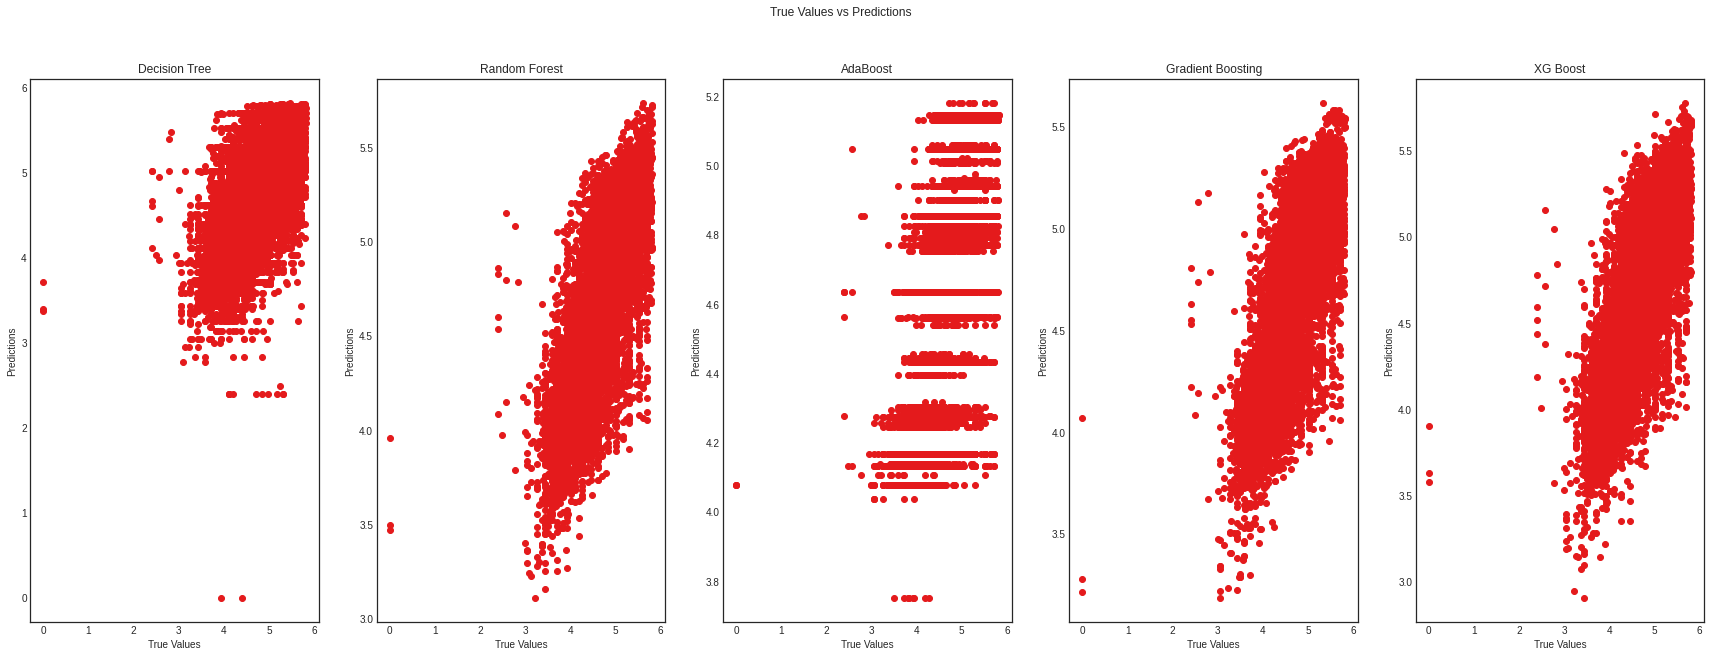

In [ ]:
fig, ((ax1, ax2, ax3, ax4, ax5)) = plt.subplots(1, 5, figsize=(30, 10))
fig.suptitle('True Values vs Predictions')

ax1.scatter(y_test, dt_pred)
ax1.set_title('Decision Tree')

ax2.scatter(y_test, rf_pred)
ax2.set_title('Random Forest')

ax3.scatter(y_test, ada_pred)
ax3.set_title('AdaBoost')

ax4.scatter(y_test, gb_pred)
ax4.set_title('Gradient Boosting')

ax5.scatter(y_test, xg_pred)
ax5.set_title('XG Boost')



for ax in fig.get_axes():
    ax.set(xlabel='True Values', ylabel='Predictions')

In [ ]:
!pip3 install lightgbm
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.3 MB 11.1 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


OSError: dlopen(/Users/jeanlahellec/Library/Python/3.9/lib/python/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: '/usr/local/opt/libomp/lib/libomp.dylib'
  Referenced from: '/Users/jeanlahellec/Library/Python/3.9/lib/python/site-packages/lightgbm/lib_lightgbm.so'
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)

In [ ]:
# Create an instance of the LGBMRegressor model with default hyperparameters
model10 = LGBMRegressor(learning_rate=0.1, max_depth= 7, n_estimators = 150, num_leaves=31) #grid search was applied to choose those parameters 
#Best parameters found:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'num_leaves': 31}

start=time()

# Fit the model to the training data
model10.fit(X_train, y_train)

# Make predictions on the testing data
rf_pred = model10.predict(X_test)

rf_pred2=(model10.predict(X_train))

# Evaluate the model performance on the testing data
print_score(y_test, rf_pred)

print_score(y_train,rf_pred2)

print(f"{round(time()-start, 2)}sec")

NameError: name 'LGBMRegressor' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

# Define the LGBMRegressor model
model10 = LGBMRegressor()

# Define the parameters to tune
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63]
}

# Define the GridSearchCV object
grid_search = GridSearchCV(model10, param_grid, cv=5)

start = time()

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Make predictions on the testing data
rf_pred = grid_search.predict(X_test)

# Evaluate the model performance on the testing data
print_score(y_test, rf_pred)

print(f"{round(time()-start, 2)}sec")

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_search.best_score_)))


R²: 0.6341907083859374
RMSE: 0.3522001775223498
MSE: 0.12404496504677469
MAE: 0.2666574880175964
MAPE: 4359592186508.915
157.98sec
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'num_leaves': 31}
Lowest RMSE found:  0.7975617257652625
